In [4]:
# Add matplotlib inline
%matplotlib inline

# Add dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Load files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [13]:
# Read city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [18]:
# Read ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [27]:
# Check for any null values in city DataFrame
print(city_data_df.count())
print(city_data_df.isnull().sum())

city            120
driver_count    120
type            120
dtype: int64
city            0
driver_count    0
type            0
dtype: int64


In [29]:
# Check for data types of city DataFrame
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [34]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [37]:
# Get the number of data points for type of cities.
print(sum(city_data_df["type"] == "Urban"))
print(sum(city_data_df["type"] == "Suburban"))
print(sum(city_data_df["type"] == "Rural"))

66
36
18


In [38]:
# Check for any null values in ride DataFrame
print(ride_data_df.count())
print(ride_data_df.isnull().sum())

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64


In [39]:
# Check for data types of ride DataFrame
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [51]:
# Merge ride and city DataFrames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [53]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [70]:
# Create the Suburban cities DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [71]:
# Create the Rural city DataFrames.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [67]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [72]:
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [75]:
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [77]:
# Get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [78]:
# Get the average fare for each city in the suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [79]:
# Get the average fare for each city in the suburban cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [81]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [82]:
# Get the average number of drivers for each suburban city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [83]:
# Get the average number of drivers for each rural city.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

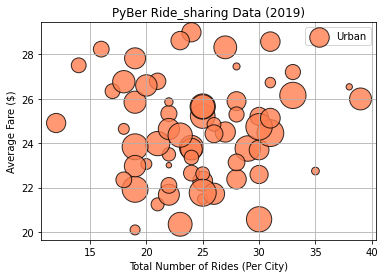

In [89]:
# Build scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = 10*urban_driver_count,
           c = "coral",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Urban")
plt.title("PyBer Ride_sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

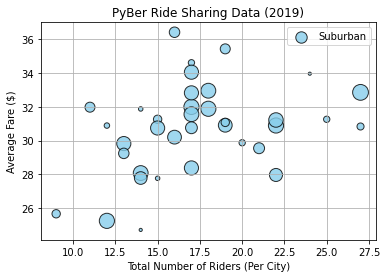

In [91]:
# Build scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s = 10*suburban_driver_count,
           c = "skyblue",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Suburban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

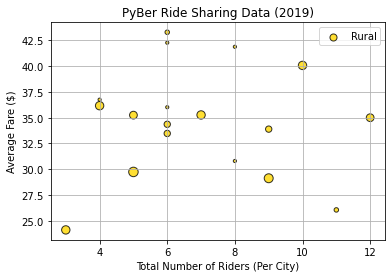

In [92]:
# Build scatter plots for rural cities.
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s = 10*rural_driver_count,
           c = "gold",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Rural")
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

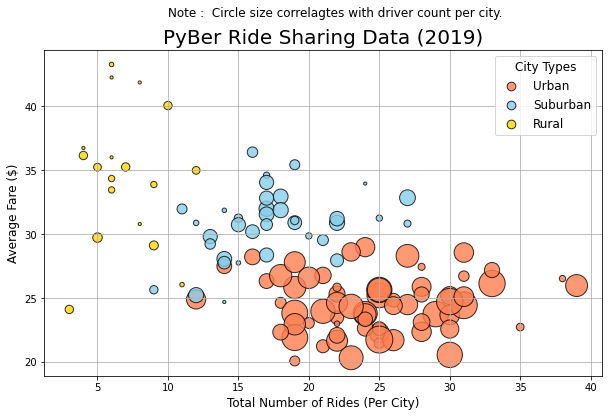

In [111]:
# Add the scatter charts for each type of city.

plt.subplots(figsize = (10,6))

plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = 10*urban_driver_count,
           c = "coral",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s = 10*suburban_driver_count,
           c = "skyblue",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s = 10*rural_driver_count,
           c = "gold",
           edgecolor = "black",
           linewidths = 1,
           alpha = 0.8,
           label = "Rural")

# Incorporate the other graph properties.
plt.title("PyBer Ride Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# Create the Legend.
lgnd = plt.legend(fontsize = "12", mode = "Expanded",
                 scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(10, 47, "Note :  Circle size correlagtes with driver count per city.", fontsize = "12")

# Save the figure
plt.savefig("analysis/Fig1.png")


In [112]:
# Get the summary statistics for urban city
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [113]:
# Get the summary statistics for urban ride count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [114]:
# Get the summary statistics for suburban ride count
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [115]:
# Get the summary statistics for rural ride count
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [116]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [117]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [125]:
# Calculate the mode of the ride count for each city type.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [119]:
# Import stats module from SciPy
import scipy.stats as sts

In [123]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
      

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [127]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
      

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [128]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
      

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [129]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [130]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [137]:
# Get the fares for suburban cities.
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [136]:
# Get the fares for rural cities.
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [135]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [145]:
# Calculate the measures of central tendency for the driver count the urban cities.
mean_urban_driver_count = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_driver_count:.0f}.")

median_urban_driver_count = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_urban_driver_count:.0f}.")

mode_urban_driver_count = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_driver_count}.")

The mean driver count for urban trips is 37.
The median driver count for urban trips is 37.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [146]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df["driver_count"]

# Calculate the measures of central tendency for the driver count the urban cities.
mean_suburban_driver_count = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is {mean_suburban_driver_count:.0f}.")

median_suburban_driver_count = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is {median_suburban_driver_count:.0f}.")

mode_suburban_driver_count = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_driver_count}.")

The mean driver count for suburban trips is 14.
The median driver count for suburban trips is 16.
The mode driver count for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [147]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df["driver_count"]

# Calculate the measures of central tendency for the driver count the urban cities.
mean_rural_driver_count = np.mean(rural_drivers)
print(f"The mean driver count for suburban trips is {mean_rural_driver_count:.0f}.")

median_rural_driver_count = np.median(rural_drivers)
print(f"The median driver count for suburban trips is {median_rural_driver_count:.0f}.")

mode_rural_driver_count = sts.mode(rural_drivers)
print(f"The mode driver count for suburban trips is {mode_rural_driver_count}.")

The mean driver count for suburban trips is 4.
The median driver count for suburban trips is 4.
The mode driver count for suburban trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


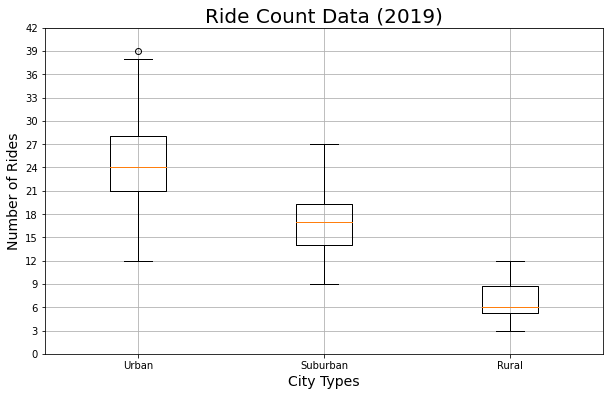

In [159]:
# Create a box-and-whisker plot for the cities ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize = (10,6))

ax.set_title("Ride Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)

ax.boxplot(ride_count_data, labels = x_labels)

ax.set_yticks(np.arange(0, 45, step = 3.0))

ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")

plt.show()

In [153]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the hightest rider count.")

West Angela has the hightest rider count.


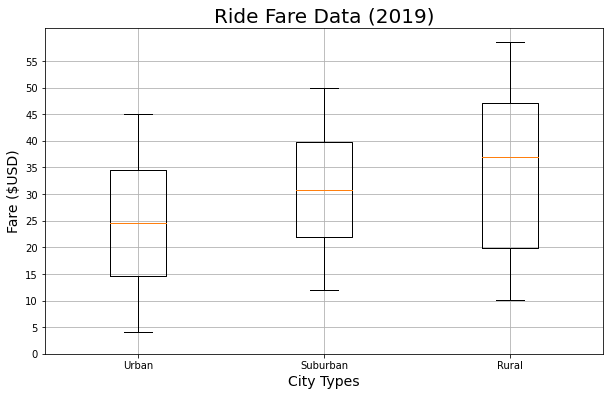

In [161]:
# Create a box-and-whisker plot for the fare data.
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(ride_fare_data, labels = x_labels)

ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_ylabel("Fare ($USD)", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0, 60, step = 5.0))

ax.grid()

plt.savefig("analysis/Fig3.png")

plt.show()

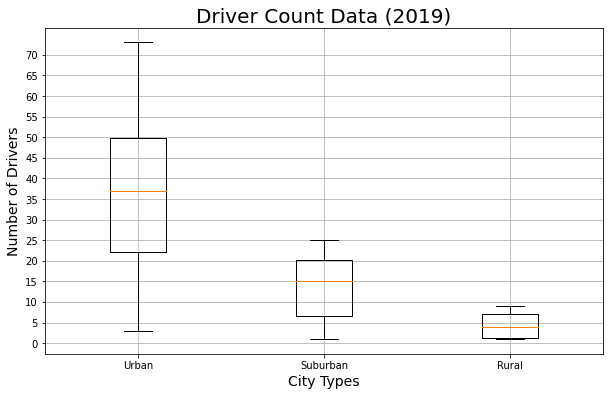

In [163]:
# Create a box-and-whisker plot for the driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_driver_count, suburban_driver_count, rural_driver_count]

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(ride_fare_data, labels = x_labels)

ax.set_title("Driver Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Drivers", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0, 75, step = 5.0))

ax.grid()

plt.savefig("analysis/Fig4.png")

plt.show()

In [164]:
# Get the sum of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [165]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [168]:
# Calculate the pecentages of fare for each city type.
type_percents = 100*sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

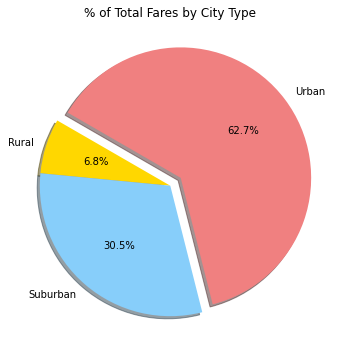

In [173]:
# Import mpl to change the plot configuration using rcParams
import matplotlib as mpl

# Build the percentages of fares by city type pie chart.
plt.subplots(figsize = (10,6))
plt.pie(type_percents, 
        labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1],
       autopct = '%1.1f%%',
       shadow = True, startangle = 150)
plt.title("% of Total Fares by City Type")

# Chage the default font size from 10 to 14.
mpl.rcParams["font.size"] = 14

#Save Figure
plt.savefig("analysis/Fig5.png")

#Show Figure
plt.show()

In [175]:
# Calculate the percentage of rides for each city type.
ride_percents = 100*pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

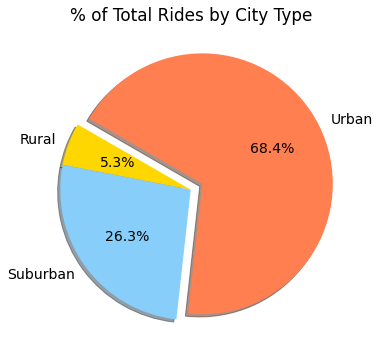

In [176]:
# Build percentage of rides by city type pie chart
plt.subplots(figsize = (10,6))

plt.pie(ride_percents,
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "coral"],
       explode = [0, 0, 0.1],
       autopct = "%1.1f%%",
       shadow = True, startangle = 150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()

In [177]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100*city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

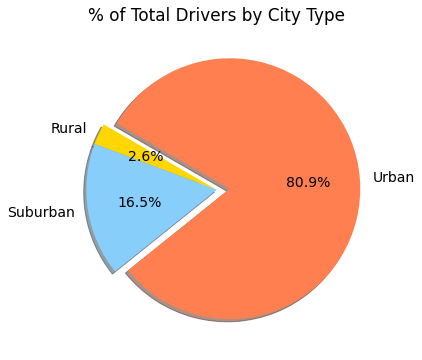

In [178]:
# Build percentage of drivers by city type pie chart
plt.subplots(figsize = (10,6))

plt.pie(driver_percents,
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "coral"],
       explode = [0, 0, 0.1],
       autopct = "%1.1f%%",
       shadow = True, startangle = 150)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()